In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


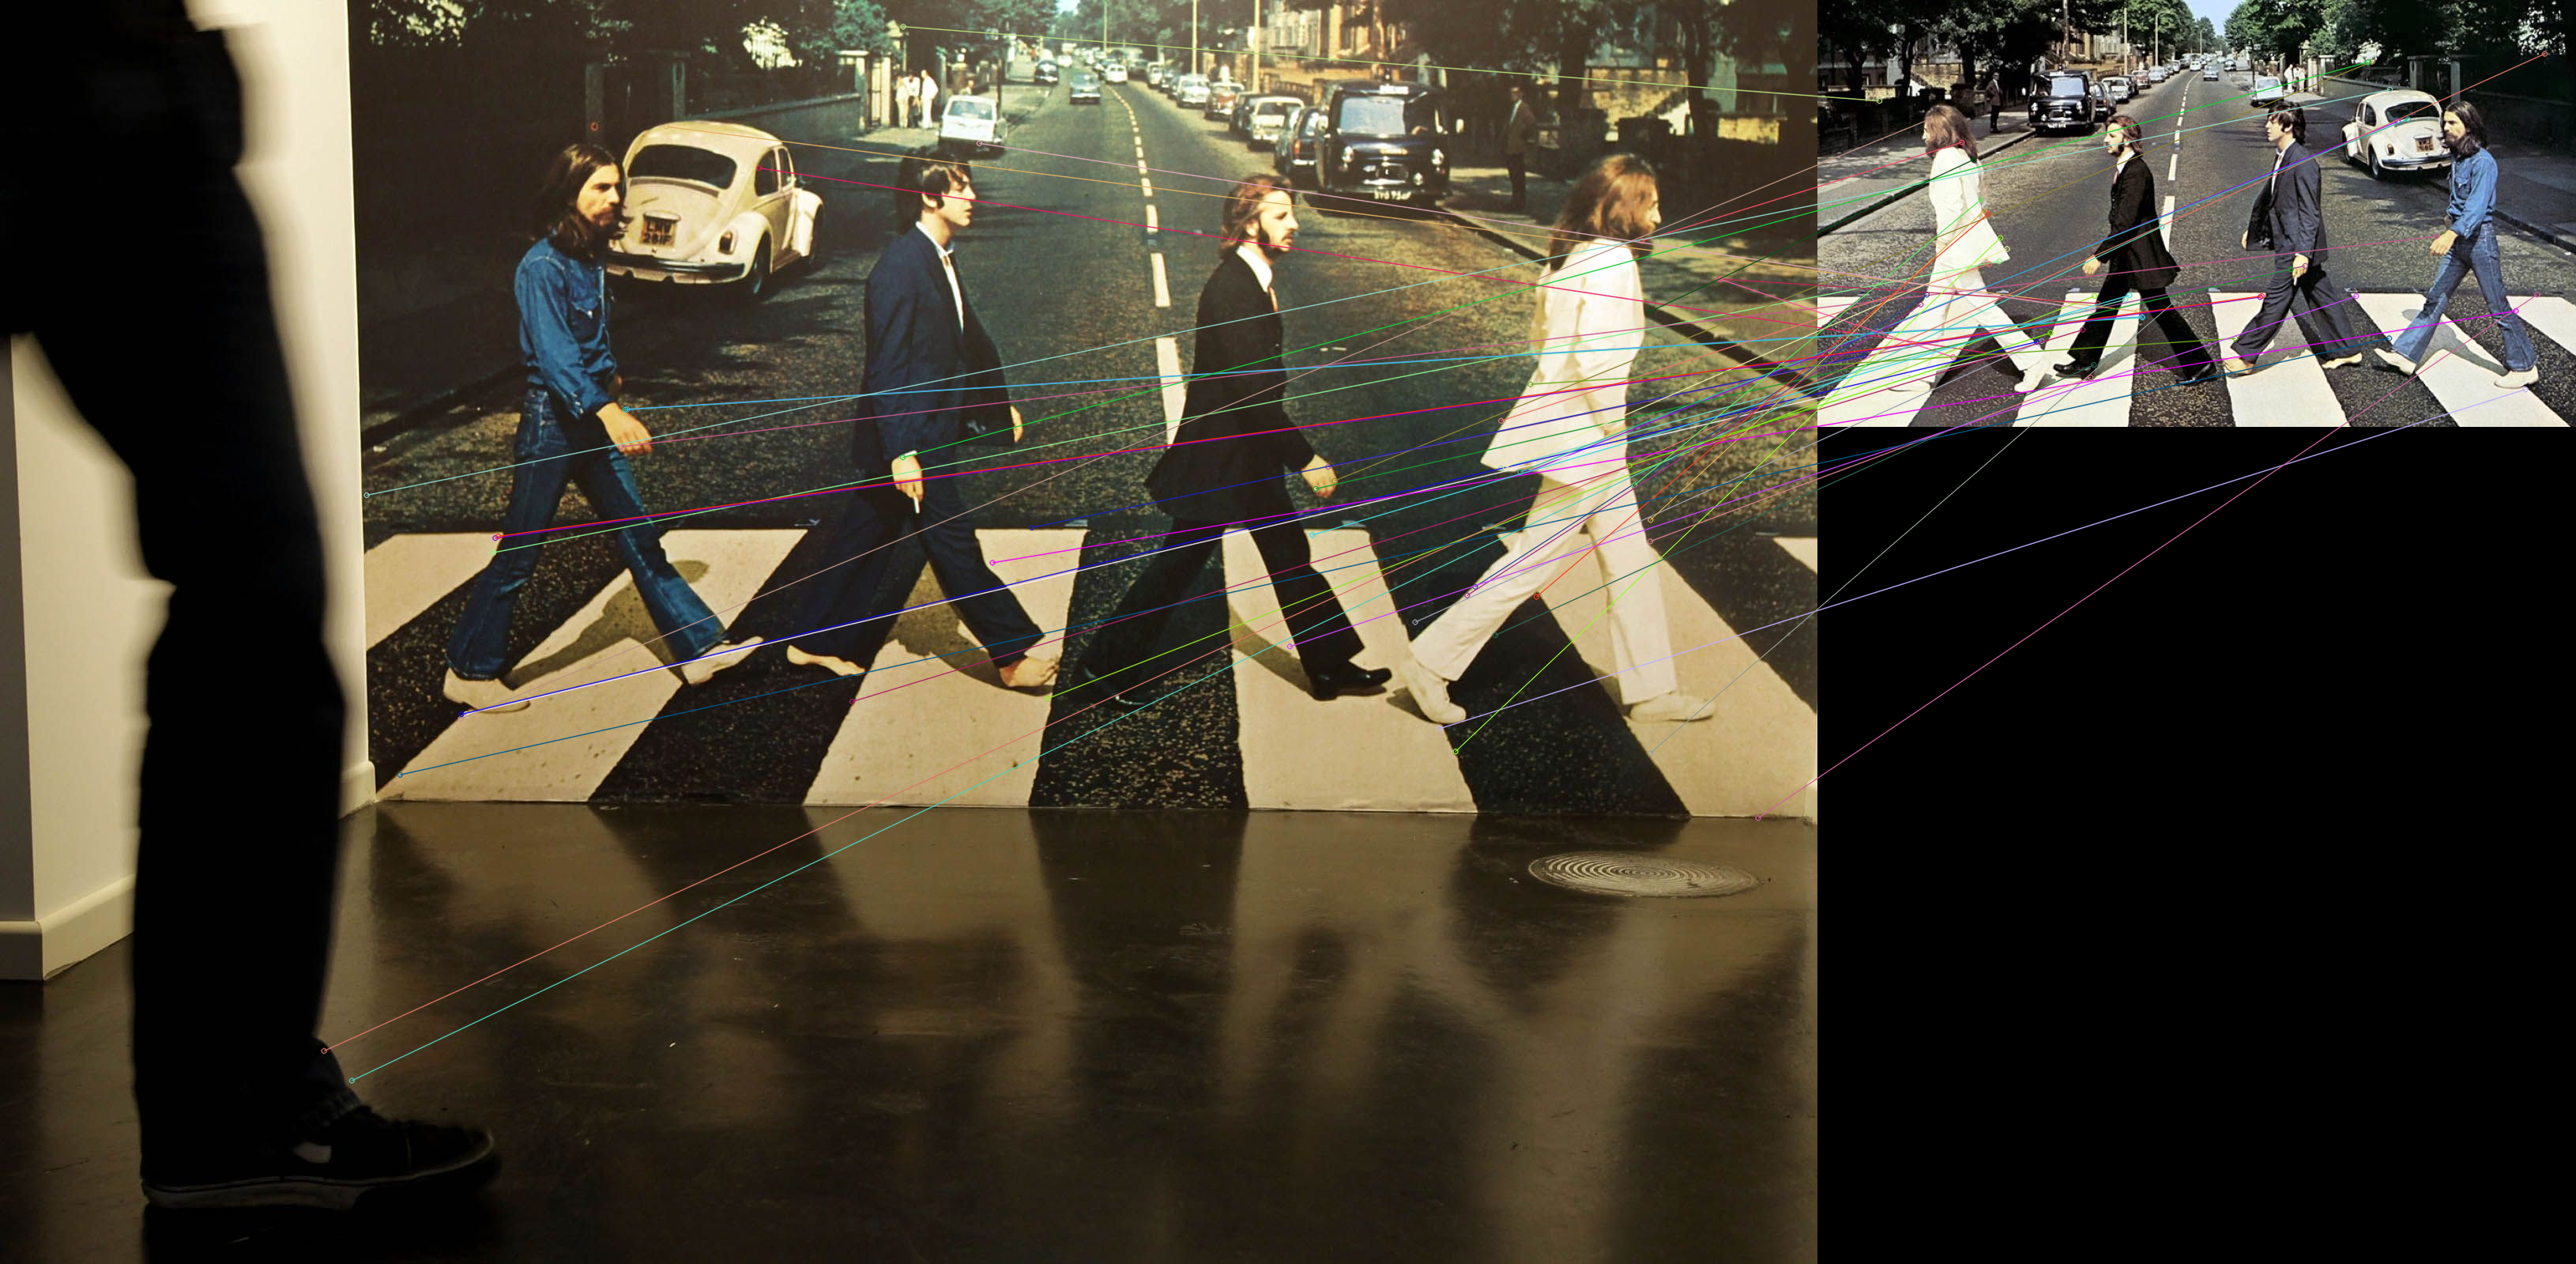

-1

In [ ]:
import cv2

# Load images
img1 = cv2.imread("/content/drive/MyDrive/CV/gallery.jpg")
img2 = cv2.imread("/content/drive/MyDrive/CV/flipped.jpg")

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Define AKAZE detector and descriptor manually
akaze = cv2.FeatureDetector_create("AKAZE")
akaze.setBool("descriptor", True)
akaze_descriptor = cv2.DescriptorExtractor_create("AKAZE")

# Detect keypoints and compute descriptors for both images
kp1 = akaze.detect(gray1)
kp1, des1 = akaze_descriptor.compute(gray1, kp1)
kp2 = akaze.detect(gray2)
kp2, des2 = akaze_descriptor.compute(gray2, kp2)

# Match descriptors using brute-force matching
matches = []
for i in range(len(des1)):
    dist = np.linalg.norm(des1[i] - des2, axis=1)
    idx = np.argmin(dist)
    matches.append(cv2.DMatch(i, idx, dist[idx]))

# Draw top 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display image with matches
cv2_imshow(img_matches)
cv2.waitKey(0)
